# ICS 434: DATA SCIENCE FUNDAMENTALS

## Clustering

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

### What is Clustering

* Clustering analysis, or clustering, is a computational approach to uncover structure in a dataset.

    * Finding groups of points within a dataset that are grouped, or lumped, together.

* It is a machine learning task.

  * It is said to be unsupervised since the analyst does not describe or provide examples of things that should belong together in a cluster.
  
    * Supervised machine learning provides labeled data a response $y$ (e.g., instances of spam email vs. ham or legit email) and trains a model to recognize if an email is either spam or ham.

### What is a Cluster?

* Descriptions such as “groups of points that are similar” or “close to each other”

* The notion of a “cluster” is not well defined 
  * Clusters may be at times subjective
    * The concept of boundary around  a set of similar points is subjective
    
* Once we see a cluster we "kind of" know what it is
  
<center><img src="https://www.dropbox.com/scl/fi/f6v3hg574r9nmfr2xep1f/cluster_def.png?rlkey=g8ymnikayfepixxdh8gz5aevf&dl=1" width="400"/>
<center>
Data clustering: 50 years beyond K-means, Jain 2009
</center> 

### Question

* Is a cluster simply a group of points that are close?
* How can you generate points that are distributed like in the figure below?

<center><img src="https://www.dropbox.com/scl/fi/0ytx0f70leabfoy3jvx01/random_points.png?rlkey=dlnnuj9b3y0c5snrl1kex0t1b&dl=1" alt="drawing" width="300"/>


In [3]:
x_axis = np.random.choice(np.arange(100), size=100)
y_axis = np.random.choice(np.arange(100), size=100)

print(x_axis[0:5])
print(y_axis[0:5])

[71 64  9 63 65]
[60 84 84 63 31]


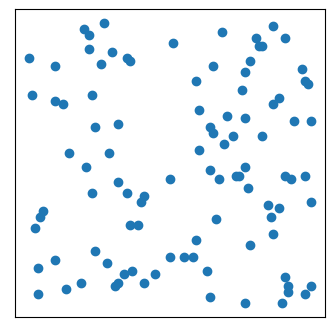

In [4]:
plt.figure(figsize=(4, 4))
plt.scatter(x_axis, y_axis)

# I used the code below to remove the x and y axis ticks ()
_ = plt.xticks([], [])
_ = plt.yticks([], [])

### What is a Cluster? -- Cont'd

- We can define a cluster as a contiguous region of high data point density
  - Points in the region are close to each other
  - Areas contain more than just a few points that seem to occur randomly together
- Regions are separated by areas of lower point density
  - Points across regions are dissimilar
  
<center><img src="https://www.dropbox.com/scl/fi/i3msfoclgxrtmtgk37r45/two_well_defined_clusters.png?rlkey=i862v028zp318txb4hgux9rug&dl=1" alt="drawing" width="300"></center>
    
* How can we generate a dataset like the one above?


In [5]:
mean_c1 = [8, 12]
cov_c1 = [[1, 0], [0, 1]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[1, 0], [0, 1]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)

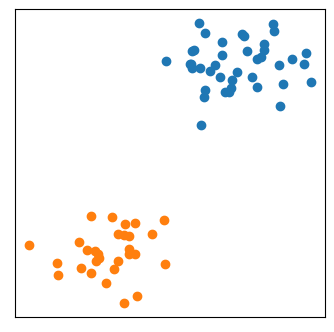

In [6]:
plt.figure(figsize=(4, 4))

plt.scatter(c1[:, 0], c1[:, 1])
plt.scatter(c2[:, 0], c2[:, 1])

plt.xticks([], [])
plt.yticks([], []);

### What is a Cluster? -- Cont'd

- Contiguous regions of high data point density need not be highly dissimilar
  - On average, points across regions are dissimilar
  - Some points may be closer than others
<center><img src="https://www.dropbox.com/scl/fi/3kxvyghm6i5ua1fiyva5n/two_cluster_less_well_defined.png?rlkey=cdluozazgtjyhb9ulxj4hmcsz&dl=1" alt="drawing" width="300"/>

### Data Shapes

* Clusters may have complicated shapes
  * While the clusters above are orderly but real clusters can be *very* messy
  * Some clusters do not subscribe to the definitions above 
  * Such clusters may challenge simple solutions

<center><img src="https://www.dropbox.com/scl/fi/3gvzp550n3dt2afvrk5ld/data_moons.png?rlkey=c1w0kauppilsa8qs54n3k22zq&dl=1" alt="drawing" width="500"/>

### Applications of Clustering

* Clustering can be applied in a variety of contexts, from genetics and genomics to user input consolidation and investment
* Definition of the clusters across domains is the same
  * Regions of high-density points where points characterized by high similarity within regions and low similarity across regions  
  * Naturally, the concept of similarity and distance between points is domain-specific
    * Similarity between two Netflix users can be defined as the degree of agreement on ratings of movies they watched
      * Or just the movies they watched
    * The similarity between two stocks, say apple and qualcom
        * Useful to the diversification of portfolios

### Example: Data Reconciliation

* Very useful for finding groups of different values that might be alternative representations of the same thing

* This is called reconciliation and can be a massive problem for some industries

<center><img src="https://www.dropbox.com/scl/fi/phrvex55h060ayd380uey/Clustering_strings.png?rlkey=q64mqq1vi38nce2kzizuk33g0&dl=1" alt="drawing" width="500"></center>

* First Avenue, First Ave, 1st Ave, Furst Ave, etc.

### Example: Stocks Clustering

* Useful to derive a strategy for assets diversification

<center><img src="https://www.dropbox.com/scl/fi/wyio8h3u2wyzebgbu8d9f/stocks_clusters.png?rlkey=cm998ukemvuzzln9tutl07k6k&dl=1" alt="drawing" width="600"/>


### Example: Market Segmentation

* Who are my potential customer groups?

  * Who is buying my app and what features should be most appropriate?

<center><img src="https://www.dropbox.com/scl/fi/y8fzr44josf6req7jy3dn/market-segmentation.png?rlkey=lc8tjxddrwzf2rcvet7r453qk&dl=1" alt="drawing" width="500"/>


### Distance and Similarity Measures 
  
* Clustering  requires being able to compute a distance (or similarity) between the data points
  * How similar are two stocks?

* A distance is any function, `d`,  that takes two points (`x` and `y`) and returns a scalar value that is a measure for how different these points are
  * The more dissimilar the points, the larger the distance 
  * It may be easier to make more sense to compute a similarity using a function `s`
    * s(x, y) can be easily converted into d(x, y)
    
* While data points do not have to be embedded into a geometric space, it helps to think about their distance (or similarity) as if they were
  * If we can transform data points to have properties of a vector space then we can develop more efficient algorithms that exploit these properties


### Distance to Similarity

<center><img src="https://www.dropbox.com/scl/fi/98dprxphhrq1aw8jdygq3/dist_sim.png?rlkey=v5u7uo7nue6iliulve8bhip65&dl=1" alt="drawing" width="700"/>


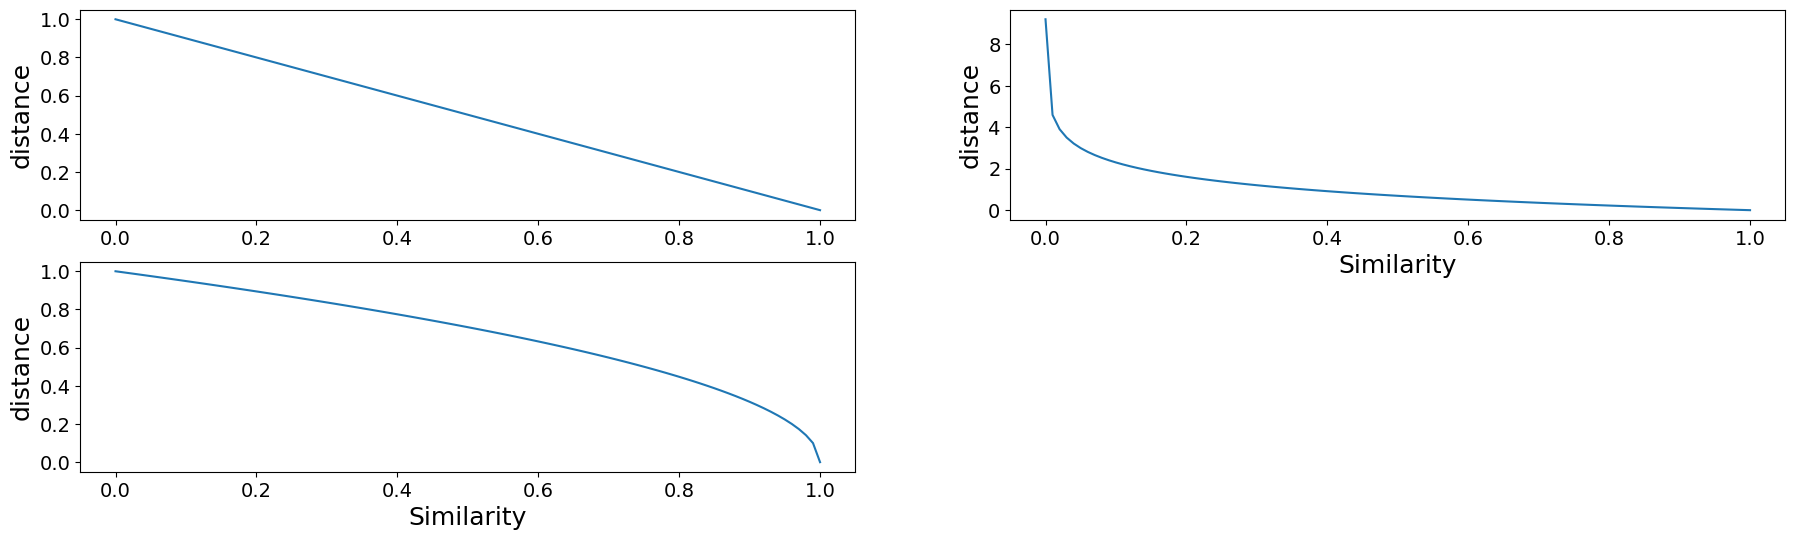

In [7]:
plt.figure(figsize=(22, 6))

similairity = np.arange(0, 1.01, 0.01)

method_1 = 1 - similairity

plt.subplot(2,2,1)
plt.plot(similairity, method_1)
# plt.xlabel("Similarity", fontsize=18)
plt.ylabel("distance", fontsize=18)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)


method_2 =  -np.log(similairity + 0.0001)

plt.subplot(2,2,2)
plt.plot(similairity, method_2)
plt.xlabel("Similarity", fontsize=18)
plt.ylabel("distance", fontsize=18)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)


method_3 =  np.sqrt(1 - similairity)

plt.subplot(2,2,3)

plt.plot(similairity, method_3)
plt.xlabel("Similarity", fontsize=18)
plt.ylabel("distance", fontsize=18)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)

### Distance and Similarity Measures -- Cont'd

* Sometimes, the concept of distance in geometric space is clear
  * Ex. Use any measure that considers the locations of the points in such a space
  * Most points are not just in 2-d but exist in higher-dimensional space
  
<center><img src="https://www.dropbox.com/scl/fi/pbq6t0995wbv2xhehk20k/distnace_a_b.png?rlkey=kqqw02unt1zj0ad9s7n2703sl&dl=1" alt="drawing" style="width:250px"/></center>
    
* Oher times, there is no obvious choice as to how to compute the distance between two points
  * You are clustering music genres. How do you compute the distance between two songs?
    

### Clustering Music Genres

* Example of an approach used to convert a song into features:
  * Identify relevant dimensions
    * For instance, beats per minute, the proportion of various instruments soloing, properties of the lyrics, or the presence/absence of certain words, etc.
  * Consider the vectors as points in high-dimensional space and use a distance measure, e.g., Euclidean, to measure the distance between two songs.

### Example: Distance Between Music Genres

<center><img src="https://www.dropbox.com/scl/fi/suwyu3psaotjw2mq9jrns/music_genres.png?rlkey=esp3kfrvemtz6cebi4dvmj90t&dl=1" width=550/></center>

<center>Genre Complexes in Popular Music. Silver et al., Plos One, 2016</center>

### Common Distance Metrics 

* For simplicity, we'll classify the distances into two high-level categories

* Euclidean and spherical geometry distances
    * Use the location of the points in an Euclidean or spherical coordinate systems to estimate their distance

* Other: Non-Euclidean and non-spherical geometry distances
    * Use properties of points to estimate their distance

* This is a coarse and somewhat subjective categorization, and other classifications are possible

### Euclidean and Spherical Distances

* The Euclidean distance
  * Most commonly used distance measure
  * Distance between two points $P$ and $Q$ with coordinate $(p_1,p_2)$ and $(q_1,q_2)$ respectively is:

$$
d_{PQ} = \sqrt{(p_1-q_1)^2 + (p_2-q_2)^2}
$$


### Euclidean and Spherical Distances -- Cont'd 

* The Manhattan (or taxicab or cityblock) distance
* Geodesic distance
  
<center><img src="https://www.dropbox.com/scl/fi/nrsyxbmoauydblxm3p51q/distances.png?rlkey=u5qbq3sgahmyw8sslzttcbhof&dl=1" alt="drawing" width="500"/>


### Non-Euclidean Distance

<br>
Examples of non-euclidean distances are: 

* Edit distance or number of inserts and deletes to change one string into another
  * Ex. what is the distance between `x = AGACGTAG` and  `y = GTTCAGA`

<center><img src="https://www.dropbox.com/scl/fi/few5r3nmoq2g1jzej0gly/edit_distance.png?rlkey=viso1y3hmxifz4tptw9gpl87x&dl=1" alt="drawing" width="600"/></center>

    Remove A, convert A to T, ... 
    The distance between `x` and `y` is 5


### Non-Euclidean Distance: Jaccard Distance

* Jaccard distance is used with sets
* It computes the number of items shared over all the items in the sets (Jaccard index)
    
<center><img src="https://www.dropbox.com/scl/fi/licq7cze2gufusath1iw9/jaccard.png?rlkey=ia1sgqkmwm8j2465ztj52xte4&dl=1" alt="drawing" width="700"/>


In [3]:
symptoms = ["Muscle Cramps", "Weight Gain", "Easy Bruising", "Metallic Taste", "Paranoia",
            "Leg Pain", "Gas and Bloating", "Mouth Sores", "Nausea, Upset Stomach", 
            "Rectal Bleeding", "Shortness of Breath", "Muscle Cramps", "Urine Odor",
            "Swollen Ankles and Feet", "Joint Cracking", "Eye Twitch", "Dry Skin"]

patient_ids = pd._testing.rands_array(6, 20)
patient_ids

array(['Sa5FmI', 'tiNdPp', 'Z4m9GU', 'XgHp7g', 'xs5rCQ', '7T6VFZ',
       'Ns3uMt', 'OVYr8G', 'VeF3Ky', 'fxfGxX', 'Xl5GLH', 'Epnjrm',
       'BzSBEV', 'Op4wXC', 'xJJEWG', 'zpQnUk', 'JQHCwB', 'HY4cTU',
       '7EzU5A', 'wHOess'], dtype=object)

In [4]:
patient_outcomes = np.random.choice([0, 1], size=(len(symptoms)))            
patient_outcomes

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [7]:
data = [np.random.choice([0, 1], size=(len(symptoms))) for _ in range(len(patient_ids))]
data

[array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1]),
 array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]),
 array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]),
 array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]),
 array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1]),
 array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1]),
 array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]),
 array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]),
 array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]),
 array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 1, 1, 1

In [8]:
patients_data = pd.DataFrame(columns=symptoms, data=data, index=patient_ids)
patients_data.head()

,Muscle Cramps,Weight Gain,Easy Bruising,Metallic Taste,Paranoia,Leg Pain,Gas and Bloating,Mouth Sores,"Nausea, Upset Stomach",Rectal Bleeding,Shortness of Breath,Muscle Cramps,Urine Odor,Swollen Ankles and Feet,Joint Cracking,Eye Twitch,Dry Skin
Sa5FmI,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0
tiNdPp,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1
Z4m9GU,1,1,0,0,1,0,0,1,1,1,0,0,1,1,1,1,0
XgHp7g,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,1,1
xs5rCQ,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,1


In [9]:
patients_data.shape

(20, 17)

In [10]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])

(vec_1 == vec_2) 

array([ True,  True, False,  True,  True])

In [11]:
x = np.array([True,  True,  False])
y = np.array([True,  False, True])

x & y

array([ True, False, False])

In [12]:
x == y

array([ True, False, False])

In [16]:
sum(x==y) 

1

In [17]:
(vec_1 == 1)

array([ True, False,  True,  True,  True])

In [14]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])

sum((vec_1 == vec_2) & (vec_1 == 1))

3

In [15]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])

sum((vec_1 == 1) | (vec_2 == 1))

4

In [16]:
def compute_Jaccard_distance(vec_1, vec_2):
    
    # All the symptoms shared by both
    intersection = sum((vec_1 == vec_2) & (vec_1 == 1))
    
    # All the symptoms that either one has
    union = sum((vec_1 == 1) | (vec_2 == 1))
    
    return 1 - intersection / union

In [17]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])

print(compute_Jaccard_distance(vec_1, vec_2))

0.25


### Distance Matrix

* It is common to store the pairwise distances between data points in a distance matrix $M$.

* The matrix has dimensions $n \times n$, where $n$ is the number of data points.

* For any two points $p_i$ and $p_j$, it is typically assumed that:

$$ 
M[i, j] = d(p_i, p_j) \\
M[j, i] = d(p_j, p_i)
$$

where $d(p_i, p_j)$ is the distance between points $p_i$ and $p_j$, and the matrix $M$ is symmetric.


In [19]:
np.random.seed(100)
dist_patients = np.zeros([3, 3])
dist_patients

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [20]:
# Compute all pair-wise Jaccard coefficients
dist_patients = np.zeros([len(patient_ids), len(patient_ids)])

for i in range(patients_data.shape[0]):
    for j in range(i, patients_data.shape[0]):
        vec_1 = patients_data.iloc[i]
        vec_2 = patients_data.iloc[j]

        # compute distance and round to two decimal points
        dist_patients[i, j] = round(compute_Jaccard_distance(vec_1, vec_2), 2)
        dist_patients[j, i] = dist_patients[i, j]
        
dist_patients.shape

(20, 20)

In [21]:
dist_patients

array([[0.  , 0.64, 0.5 , 0.69, 0.6 , 0.93, 0.92, 0.69, 0.79, 0.64, 0.67,
        0.71, 0.71, 0.85, 0.73, 0.77, 0.77, 0.83, 0.69, 0.54],
       [0.64, 0.  , 0.64, 0.5 , 0.75, 0.69, 0.73, 0.71, 0.5 , 0.46, 0.79,
        0.73, 0.64, 0.77, 0.93, 0.58, 0.58, 0.64, 0.8 , 0.57],
       [0.5 , 0.64, 0.  , 0.69, 0.62, 0.75, 0.79, 0.6 , 0.6 , 0.36, 0.46,
        0.53, 0.53, 0.64, 0.62, 0.82, 0.75, 0.8 , 0.5 , 0.47],
       [0.69, 0.5 , 0.69, 0.  , 0.69, 0.64, 0.67, 0.33, 0.33, 0.62, 0.73,
        0.5 , 0.5 , 0.62, 0.79, 0.42, 0.27, 0.69, 0.67, 0.53],
       [0.6 , 0.75, 0.62, 0.69, 0.  , 0.77, 0.7 , 0.79, 0.69, 0.54, 0.55,
        0.71, 0.71, 0.85, 0.44, 0.77, 0.77, 0.92, 0.45, 0.64],
       [0.93, 0.69, 0.75, 0.64, 0.77, 0.  , 0.75, 0.73, 0.64, 0.6 , 0.71,
        0.46, 0.67, 0.69, 0.67, 0.5 , 0.5 , 0.67, 0.54, 0.6 ],
       [0.92, 0.73, 0.79, 0.67, 0.7 , 0.75, 0.  , 0.67, 0.55, 0.62, 0.75,
        0.69, 0.45, 0.73, 0.82, 0.75, 0.75, 0.7 , 0.67, 0.88],
       [0.69, 0.71, 0.6 , 0.33, 0.79, 0.7

In [22]:
dist_patients[:5, :5]

array([[0.  , 0.64, 0.5 , 0.69, 0.6 ],
       [0.64, 0.  , 0.64, 0.5 , 0.75],
       [0.5 , 0.64, 0.  , 0.69, 0.62],
       [0.69, 0.5 , 0.69, 0.  , 0.69],
       [0.6 , 0.75, 0.62, 0.69, 0.  ]])

In [37]:
from numpy import unravel_index

max_idx = unravel_index(np.argmax(dist_patients), dist_patients.shape)

print(np.nanmax(dist_patients), np.nanargmax(dist_patients), max_idx)

patients_data.iloc[[max_idx[0], max_idx[1]]]

1.0 297 (14, 17)


,Muscle Cramps,Weight Gain,Easy Bruising,Metallic Taste,Paranoia,Leg Pain,Gas and Bloating,Mouth Sores,"Nausea, Upset Stomach",Rectal Bleeding,Shortness of Breath,Muscle Cramps,Urine Odor,Swollen Ankles and Feet,Joint Cracking,Eye Twitch,Dry Skin
X3q7w1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
RLLgkV,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1


In [21]:
# What is the index in a 3x3 matrix of element at position 5 in an unraveled matrix?

array_shape = (3, 3)

flat_index = 5

# Convert the flat index to a 2D index
coords = np.unravel_index(flat_index, array_shape)
coords

(1, 2)

In [38]:

dist_patients_temp = dist_patients.copy()

for i in range(patients_data.shape[0]):
    dist_patients_temp[i, i] = 1000

min_idx = np.unravel_index(np.argmin(dist_patients_temp), dist_patients_temp.shape)

print(np.nanmin(dist_patients_temp), np.nanargmin(dist_patients_temp), min_idx)

patients_data.iloc[[min_idx[0], min_idx[1]]]

0.27 76 (3, 16)


,Muscle Cramps,Weight Gain,Easy Bruising,Metallic Taste,Paranoia,Leg Pain,Gas and Bloating,Mouth Sores,"Nausea, Upset Stomach",Rectal Bleeding,Shortness of Breath,Muscle Cramps,Urine Odor,Swollen Ankles and Feet,Joint Cracking,Eye Twitch,Dry Skin
POsi8h,0,0,1,0,1,0,0,1,0,1,1,1,1,1,1,1,0
So27VP,0,1,1,0,1,0,0,1,0,1,1,0,1,1,0,1,0


###  Devising Your Own Distance

* There are certain properties that a distance (or similarity) function should have
  * A distance in a mathematical sense must have at least the following properties (properties of a metric)
    * Non-negativity rule $d(x, y) \ge 0$
    * Symmetry rule $d(x, y) = d(y, x)$
    * Triangle Inequality rule $d(x, y) + d(y, z) \ge d(x, z)$ 

* In practice, it may be hard to identify a distance that guarantees all these properties
  * Some metrics are not symmetric
     * E.g., length of the shortest clockwise path between $p$ and $q$ 
       * Navigation on a one-way road: If 
$p$ and  $q$ are locations on a circular track or road that allows only clockwise movement, then the distance from 
$p$ to $q$ along this path might be shorter than the distance from  $q$ to $p$.
  * For technical reasons, the symmetry property is usually highly desirable
    * You can always construct a symmetric distance function from an asymmetric one
$$
    dS(x,y)= \frac{d(x,y)+d(y,x)}{2}
$$

### Smooth Functions are Better than Non-Smooth Ones

* Naive distance

$$
d(x,y) = \sum{d_i(x_i, y_i)}
$$

$\hspace{0.6in}$ where

$$
d_i(x_i, y_i)= \left\{
    \begin{array}{ll}
        1 & \mbox{if } x_i=y_i \\
        0 & \mbox{otherwise}
    \end{array}
\right.
$$

* This function is not smooth
  * Difference between `[1, 2]` and `[2, 3]` is the same as the difference between `[1, 2]` and `[100, 200]`

### Clustering Approaches

In this section we will cover two approaches to clustering a set of points into  clusters

* Hierarchical 
  * Each point is a cluster
  * Repeatedly combine the two “closest” clusters into one
  * Stop when only one cluster remains
  * This is also known as "agglomerative hierarchical clustering"
  
* Point-to-cluster Assignment
  * Maintain a set of `k` clusters (ex. `k = 3`)
  * Place points into “closest” cluster
    * Iteratively repeat the process until the solution is stable
    
* There are more advanced/complex approaches
  * Difficult to combine into categories because of the diversity of approaches and overlaps
  * Probabilistic methods increasingly popular
  * Will briefly cover other methods to visualize cluster
     * PCA, T-SNE and UMAP


### Clustering Approaches

In this section we will cover two approaches to clustering a set of points into  clusters

* Hierarchical 
  * Each point is a cluster
  * Repeatedly combine the two “closest” clusters into one
  * Stop when only one cluster remains
  * This is also known as "agglomerative hierarchical clustering"
  
* Point-to-cluster Assignment
  * Maintain a set of `k` clusters (ex. `k = 3`)
  * Place points into “closest” cluster
    * Iteratively repeat the process until the solution is stable
    
* There are more advanced/complex approaches
  * Difficult to combine into categories because of the diversity of approaches and overlaps
  * Probabilistic methods increasingly popular


### Hierarchical Clustering

<center><img src="https://www.dropbox.com/scl/fi/ozfaisljkehldbm9fxirr/hierarchical_clustering.png?rlkey=c5owo2jv7r2mn30w4xi4u06ul&dl=1" alt="drawing" width="650"/>


### Hierarchical Clustering Dendogram Representation

<center><img src="https://www.dropbox.com/scl/fi/tyw58dsbxciez0sbf9wya/hierarchical_clustering_dendo.png?rlkey=iilfgn0hrp92bkwzbdyc9otkm&dl=1" alt="drawing" width="750"/>


### Hierarchical Clustering -- Cont'd

* Repeatedly combine the two “closest” clusters into one

* How do you know which pair of clusters is the closest?
  * We can only compute the distances between two points

* One possible solution: 
  * Represent the location of each cluster using a single measure:
    * E.g., centroid, or the average of all points in a cluster

  * Take all centroids and find the closest pair      

### Question

* Does the centroid approach work for all types of data?

    * How do you compute the centroid for the DNA sequences from before?


### Hierarchical Clustering with Non-Euclidean Distances

* There is no “average” of two points

* We can compute the distance between two clusters using other approaches. For example:
    
  * Minimum of the distances between any two points, one from each cluster
    * Minimum Linkage (or Single Linkage)
  * Maximum of the distances between any two points, one from each cluster
    * Maximum Linkage (or Complete Linkage)
  * Average of the distances between any two points, one from each cluster
    * Average Linkage

* Pick a notion of “cohesion” of clusters, e.g., the maximum distance from the clusteroid 

  * A clusteroid is simply the center of the cluster based on, for example, the average of intra-cluster distances


### Question

* Given $n$ data points, what is the complexity of clustering in the worst-case scenario?
* Recall we need to:

  1- Build the distance matrix
  
  2- Merge $n$ points iteratively until we end up with a single cluster


### Hierarchical Clustering Results

* Easy to implement and understand (plus)

* Method is computationally intensive (minus)

* Extracting clusters can be tricky! (minus)

   * Data points are leaves 
   * Distance in the tree between the leaves is representative of the distance between the data points


### Hierarchical Clustering Results

* Easy to implement and understand (plus)
  * Provides an interpretable visualization of the algorithm and data

* Useful summarization tool giving a holistic view (plus)

* Method is computationally intensive (minus)

* Extracting clusters can be tricky! (minus)

   * Data points are leaves 
   * Distance in the tree between the leaves is representative of the distance between the data points


### Second Category: Assigning Points to Clusters

* A popular clustering algorithm

* Two steps:
  * Define the number of clusters 
  * Initializing cluster representatives
  * Assignment of points to each cluster
  * Recalculating the centroids


### Second Category: Assigning Points to Clusters

* A popular clustering algorithm

* Steps:
  * Define the number of clusters 
  * Initialize cluster representatives (centroids)
  * Assign points to each cluster
  * Recalculate the centroids


### k-Means Clustering Steps

* Assumes Euclidean space
  * Cannot handle categorical data

<center><img src="https://www.dropbox.com/scl/fi/sdgfey9wkl2zwzlgf3hr8/kmeans_a.png?rlkey=sm8q7m7friituorf349sksycb&dl=1" width="350"/>



### k-Means Clustering: Initialization

* Initialize clusters by $k$ points; one per cluster
  * Those are the cluster representatives; the cluster centroids
     * For instance, take $k$ points in space at random
  
<center><img src="https://www.dropbox.com/scl/fi/fpoysasv2caspmox4glu1/kmeans_b.png?rlkey=d9uiefg0g88nwshg2g59wrcka&dl=1" width="350"/>

### k-Means Clustering: Assign Points to Clusters

* Place each point in the cluster identified by the closest centroid

  * Here, we "paint" the examples with the same color as the cluster centroid to which it was assigned
  
<center><img src="https://www.dropbox.com/scl/fi/li1cg4pmxsq7pv39kxib2/kmeans_c.png?rlkey=0jbj1ev6aoi16bmdh5m2bx8p3&dl=1" width="350"/>


### k-Means Clustering: Recalculate the Centroids

* After all points are assigned, recompute the centroids of the $k$ clusters

<center><img src="https://www.dropbox.com/scl/fi/r5lx77betbor2tw6umzil/kmeans_d.png?rlkey=kembglyyxpa40z2yg6y6tvtbg&dl=1" width="350"/>


### k-Means Clustering: Assign and Recalculate Centroids 

* Repeat these two steps until convergence

  * The clustering is stable, and nothing changes
      * I.e., assigning the points to the closest centroid and recomputing the centroids does not change the centroids or the assignments


### k-Means Clustering Results

* Algorithm is non-deterministic (minus)
  * A different choice of starting values may result in a different assignment of points to clusters
    * Customary to run the k-means algorithm several times and compare results or compute a consensus

* Cannot be used with categorical data (non-Euclidean space) (minus)
  * Difficult, or sometimes impossible, to construct centroids from categorical data
  
* Can use k-medoid, the smallest average distance to all other points in the cluster (plus)
    * A medoid is the point in the cluster with the smallest distance to all the other points in the cluster
        * Less affected by outliers
        * More stable


### k-Means Clustering Results -- Cont'd

* Can take a long time to converge with some poor initializations  (minus)  
  * Very rare, but a possibility, nevertheless 

* Computationally efficient $O(k \cdot t \cdot n)$ (plus)
  * Linear in the number of points!
  * Small number of iterations to converge (10–50 iterations are typical)

* Works relatively well in real life

### How Do We Evaluate the Results of Clustering

* What distinguishes a good clustering solution from a bad one?

* Recall that what we want is:
  1. Points within the same cluster to be very similar; 
     * The average distance between points in the same cluster should be small
     * This is called *cohesion* and it should be relatively small
  2. Points across clusters to be highly dissimilar; 
      * Distance between points from distinct clusters should be large
      * This is called *separation* and it should be relatively large
  
* A criteria to evaluate a clustering solution:
$$
    \frac{separation}{cohesion}
$$ 
$\hspace{0.6in} -$ Large separation compared to low cohesion<br>
$\hspace{0.6in} -$ Large values are indicative of a good separation 


### The Silhouette Coefficient

* A good "score" to estimate the ratio of separation to cohesion
  * *Silhouette Score*: the mean silhouette coefficient over all data instances

* For each cluster we denote:
  * $a_i$ is the average distance that point $i$ has from all points in the same cluster (i.e., the mean intra-cluster distance)
    * Represents the cohesion; we want it to be as small as possible   
  * $b_i$ be the smallest distance between point $i$ and a point not in the same cluster as point $i$
    * Represents separation; we want it to be as large as possible 

### The Silhouette Coefficient -- Cont'd

* We measure the Silhouette Coefficient of a point $i$ as 

$$
S_i = \frac{b_i - a_i}{max(a_i, b_i)}
$$

* Silhouette coefficient ranges from −1 to 1
  * Negative values indicate $a_i$ is larger than $b_i$
    * Low cohesion or small separation or both
    * This suggests poor clustering
  * Positive values indicate $b_i$ is larger than $a_i$
    * High cohesion or high separation or both
    

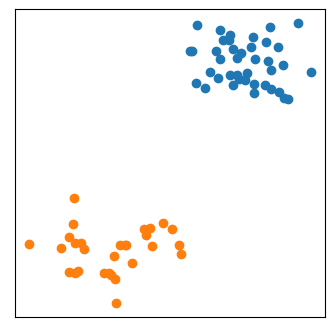

In [27]:
mean_c1 = [8, 12]
cov_c1 = [[1, 0], [0, 1]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[1, 0], [0, 1]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)

plt.figure(figsize=(4, 4))
plt.scatter(c1[:, 0], c1[:, 1])
plt.scatter(c2[:, 0], c2[:, 1])

plt.xticks([], [])
plt.yticks([], []);

In [29]:
from scipy.spatial import distance

def compute_b(pt_cl1, c2):
    # Closest points across cluster distant points
    min_dist = np.inf
    hit_pt_c2 = None
    
    for j, pt2 in enumerate(c2):
        d = distance.euclidean(pt_cl1, pt2)
        if d < min_dist:
            min_dist = d
            hit_pt_c2 = pt2
            
    return hit_pt_c2, min_dist

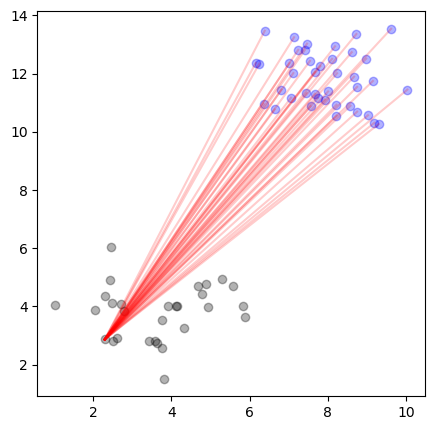

In [30]:
pt_c2 = c2[10]

plt.figure(figsize=(5, 5))
plt.scatter(c1[:, 0], c1[:, 1], c="blue", alpha=0.3)
plt.scatter(c2[:, 0], c2[:, 1], c='black', alpha=0.3)

for other_pt in c1:
    plt.plot([pt_c2[0], other_pt[0]], [pt_c2[1], other_pt[1]], 'r-', alpha=0.2)

In [31]:
compute_b(pt_c2, c1)

(array([ 6.64360095, 10.76756549]), 9.020962811698482)

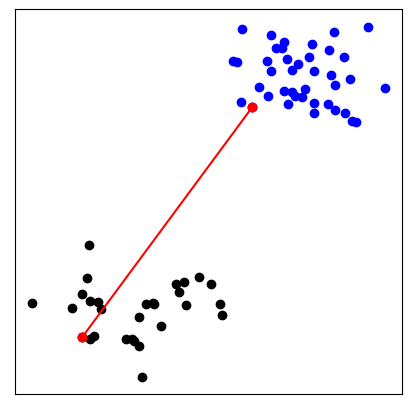

In [32]:
closest_pt, _ = compute_b(pt_c2, c1)

plt.figure(figsize=(5, 5))
plt.scatter(c1[:, 0], c1[:, 1], c="blue")
plt.scatter(c2[:, 0], c2[:, 1], c='black')
plt.scatter(pt_c2[0], pt_c2[1], color='red')
plt.scatter(closest_pt[0], closest_pt[1], color='red')
plt.plot([pt_c2[0], closest_pt[0]], [pt_c2[1], closest_pt[1]], 'ro-')

plt.xticks([], [])
plt.yticks([], []);

In [33]:
def compute_a(cluster, target_pt_id):
    distances = []
    for other_pt_id in range(len(cluster)):
        if target_pt_id != other_pt_id:
            distances.append(distance.euclidean(cluster[target_pt_id], cluster[other_pt_id]))
            
    return np.mean(distances)

In [34]:
# plt.figure(figsize=(5, 5))
# plt.scatter(c1[:,0], c1[:, 1], c="blue", alpha=0.3)
# plt.scatter(c2[:,0], c2[:, 1], c='black', alpha=0.3)

# for pt1 in c2:
#     if pt2 in c2:
#         plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-', alpha=0.3)  

In [35]:
pt_id_c2 = 10
compute_a(c2, pt_id_c2)

2.0634996210278405

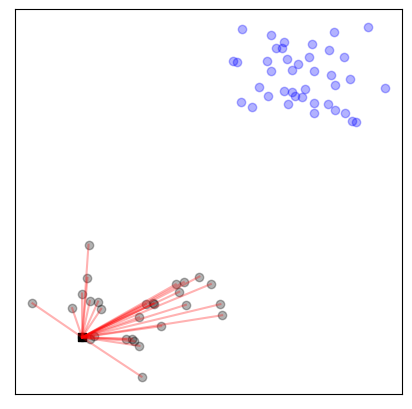

In [36]:
pt_id_c2 = 10
pt_c2 = c2[pt_id_c2]

plt.figure(figsize=(5, 5))
plt.scatter(c1[:,0], c1[:, 1], c="blue", alpha=0.3)
plt.scatter(c2[:,0], c2[:, 1], c='black', alpha=0.3)

plt.xticks([], [])
plt.yticks([], [])

for other_pt_id, other_pt in enumerate(c2):
    if other_pt_id != pt_id_c2:
        plt.plot([pt_c2[0], other_pt[0]], [pt_c2[1], other_pt[1]], 'r-', alpha=0.3)
        
plt.scatter(pt_c2[0], pt_c2[1], c='k', marker="s", alpha=1);

In [37]:
def pt_silhouette(cluster, target_pt_id, other_cluster):
    a_i = compute_a(cluster, target_pt_id)
    _, b_i = compute_b(cluster[target_pt_id], other_cluster)
    
    return (b_i - a_i) / max(a_i, b_i)

pt_silhouette(c2, pt_id_c2, c1)    

0.7712550573479948

In [38]:
pt_id_c1 = 21
pt_c1 = c1[pt_id_c1]

print(compute_a(c1, pt_id_c1))
print(compute_b(pt_c1, c2)[1])

pt_silhouette(c1, pt_id_c1, c2)

1.2875797273328715
6.982568942283778


0.8156008572237964

In [39]:
pt_id_c1 = 21
pt_c1 = c1[pt_id_c1]

pt_silhouette(c1, pt_id_c1, c2)

0.8156008572237964

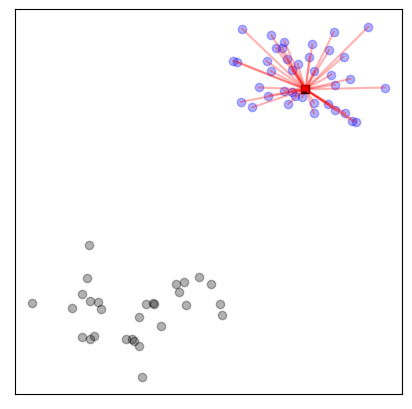

In [40]:
plt.figure(figsize=(5, 5))
plt.scatter(c1[:,0], c1[:, 1], c="blue", alpha=0.3)
plt.scatter(c2[:,0], c2[:, 1], c='black', alpha=0.3)

plt.xticks([], [])
plt.yticks([], [])

for other_pt in c1:
    if other_pt_id != pt_id_c1:
        plt.plot([pt_c1[0], other_pt[0]], [pt_c1[1], other_pt[1]], 'r-', alpha=0.3)
        
plt.scatter(pt_c1[0], pt_c1[1], c='k', marker="s", alpha=1);

### Computing Cluster-Wide Silhouette Coefficient

* Average silhouette coefficients within cluster 
  * A good indicator of the quality of the entire cluster
  * Same observations as before; large values denote good separation


### Computig Cluster-Wide Silhouette Coefficient -- Cont'd

* Average over the silhouette coefficients for all data points

  * Provides a good estimate of the quality of the overall clustering
 

In [41]:
# For simplicity, the solution assumes two clusters 
# Need to consider additional clusters in solution

def cluster_silhouette(cluster, other_cluster):
    silhouette_coeffs = []
    for pt_id in range(len(cluster)):
        silhouette_coeffs.append(pt_silhouette(cluster, pt_id, other_cluster))

    return(np.mean(silhouette_coeffs))

In [42]:
print(cluster_silhouette(c1, c2), cluster_silhouette(c2, c1))
np.mean([cluster_silhouette(c1, c2), cluster_silhouette(c2, c1)])

0.7671428476008759 0.7364318841721602


0.7517873658865181

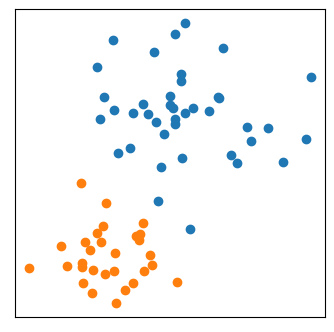

In [43]:
mean_c1 = [8, 12]
cov_c1 = [[6, 0], [0, 9]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[2, 0], [0, 2]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)

plt.figure(figsize=(4, 4))
plt.scatter(c1[:, 0], c1[:, 1])
plt.scatter(c2[:, 0], c2[:, 1])

plt.xticks([], [])
plt.yticks([], []);

In [44]:
print(cluster_silhouette(c1, c2), cluster_silhouette(c2, c1))
np.mean([cluster_silhouette(c1, c2), cluster_silhouette(c2, c1)])

0.24748093887812347 0.22409011299513776


0.2357855259366306

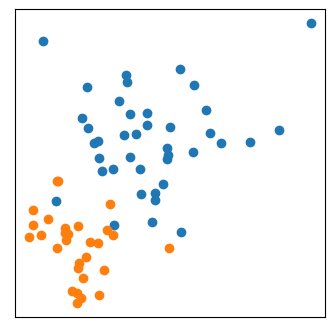

In [45]:
mean_c1 = [8, 12]
cov_c1 = [[8, 0], [0, 15]]
c1 = np.random.multivariate_normal(mean_c1, cov_c1, 40)

mean_c2 = [4, 4]
cov_c2 = [[4, 0], [0, 10]]
c2 = np.random.multivariate_normal(mean_c2, cov_c2, 29)

plt.figure(figsize=(4, 4))
plt.scatter(c1[:, 0], c1[:, 1])
plt.scatter(c2[:, 0], c2[:, 1])

plt.xticks([], [])
plt.yticks([], []);

In [46]:
print(cluster_silhouette(c1, c2), cluster_silhouette(c2, c1))
np.mean([cluster_silhouette(c1, c2), cluster_silhouette(c2, c1)])

-0.053665981224858196 -0.2016209514580024


-0.1276434663414303

### Using Silhouettes to Decide on Best Number of Cluster 

* Silhouette coefficient can be useful to determine the number of clusters present in the dataset

* Run the algorithm several times for each possible value of $k$ and compute the overall silhouette coefficient each time

  * We should observe a peak at the best value of $k$
 
<br>

### Question

* Why do we need to run the $k$-means algorithm *several times* for each value of $k$ we would like to test?

### Using Silhouettes to Decide on Best Number of Cluster 

* Silhouette coefficient can be useful to determine the number of clusters present in the dataset

* Run the algorithm several times for each possible value of $k$ and compute the overall silhouette coefficient each time
  * We should observe a peak at the best value of $k$


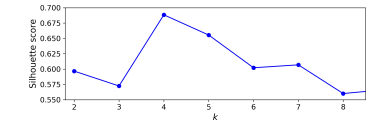


Source: A. Geron, 2019